In [1]:
# import library..
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [2]:
from google.colab import files
files.upload()

Saving Tour_Planner7.csv to Tour_Planner7.csv


{'Tour_Planner7.csv': b"Travelling_month,transport,count_travel_Times,Personal_rating,total_members,total_cost,Tourists_Spot\r\n11,2,3,5,8,9000,Sajek\r\n11,2,4,4,8,3000,Sitakunda\r\n1,2,2,4,6,7500,Saint_Martin\r\n1,2,1,5,3,2000,Tanguar_Haor\r\n10,2,1,5,18,5000,Sajek\r\n9,2,2,4,8,8000,Bandarban\r\n11,2,4,4,8,3000,Sitakunda\r\n1,2,2,4,6,7500,Saint_Martin\r\n12,5,1,5,2,7000,Sajek\r\n3,3,1,1,2,8500,Sajek\r\n1,2,1,5,3,2000,Tanguar_Haor\r\n9,2,2,4,8,8000,Bandarban\r\n12,1,3,5,6,5500,Khagrachari\r\n12,1,5,5,5,6000,Sundarban\r\n1,2,2,4,6,7500,Saint_Martin\r\n1,4,2,4,7,5000,Kuakata\r\n1,2,1,5,3,2000,Tanguar_Haor\r\n1,1,1,5,5,2500,Sitakunda\r\n9,2,2,4,8,8000,Bandarban\r\n10,2,3,3,8,2000,Rangamati\r\n1,2,2,4,6,7500,Saint_Martin\r\n9,2,2,4,8,8000,Bandarban\r\n12,5,1,5,2,7000,Sajek\r\n11,2,1,3,15,9000,Rangamati\r\n11,2,5,5,12,4000,Kuakata\r\n9,2,2,4,8,8000,Bandarban\r\n10,2,3,3,8,2000,Rangamati\r\n1,1,1,5,5,2500,Sitakunda\r\n1,2,2,4,6,7500,Saint_Martin\r\n4,2,3,4,6,7000,Sajek\r\n10,2,3,3,8,2000,Ran

In [3]:
myFile=  pd.read_csv('Tour_Planner7.csv')
myFile.head()

,Travelling_month,transport,count_travel_Times,Personal_rating,total_members,total_cost,Tourists_Spot
0,11,2,3,5,8,9000,Sajek
1,11,2,4,4,8,3000,Sitakunda
2,1,2,2,4,6,7500,Saint_Martin
3,1,2,1,5,3,2000,Tanguar_Haor
4,10,2,1,5,18,5000,Sajek


In [4]:
print(myFile.shape)

(1238, 7)


In [5]:
myFile['Tourists_Spot'].value_counts()

Sylhet          136
Tanguar_Haor    126
Saint_Martin    121
Sajek           115
Bandarban       114
Cox's_Bazar     114
Kuakata         108
Khagrachari     102
Rangamati       102
Sundarban       101
Sitakunda        99
Name: Tourists_Spot, dtype: int64

In [6]:
myFile.groupby(["Tourists_Spot"])

In [7]:
#Grouping data using grouoby
myFile.groupby(["Tourists_Spot"]).mean()

,Travelling_month,transport,count_travel_Times,Personal_rating,total_members,total_cost
Tourists_Spot,,,,,,
Bandarban,6.894737,2.456140,2.429825,4.350877,6.859649,7321.052632
Cox's_Bazar,4.385965,2.254386,2.307018,4.254386,6.657895,9035.964912
Khagrachari,6.774510,2.294118,2.196078,4.607843,6.196078,5720.588235
Kuakata,6.166667,3.435185,2.685185,4.240741,6.768519,5773.148148
Rangamati,3.862745,2.000000,3.470588,4.431373,7.392157,6419.607843
Saint_Martin,3.016529,2.702479,2.148760,4.446281,6.446281,7309.917355
Sajek,7.313043,2.208696,2.313043,4.243478,8.469565,6849.565217
Sitakunda,3.959596,2.222222,3.111111,3.989899,6.202020,3270.909091
Sundarban,7.683168,2.485149,2.534653,4.247525,7.405941,5687.128713


In [8]:
myFile.describe()

,Travelling_month,transport,count_travel_Times,Personal_rating,total_members,total_cost
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,5.420032,2.384491,2.557351,4.260905,6.985460,5870.654281
std,4.016094,1.150369,1.403146,0.857101,4.489252,2318.304159
min,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000
25%,2.000000,2.000000,2.000000,4.000000,4.000000,4500.000000
50%,4.000000,2.000000,2.000000,4.000000,6.000000,6000.000000
75%,10.000000,3.000000,3.000000,5.000000,8.750000,7500.000000
max,13.000000,5.000000,15.000000,5.000000,80.000000,15000.000000


In [9]:
le= LabelEncoder()
for column_name in myFile.columns:
  if myFile['Tourists_Spot'].dtype == object:
            myFile['Tourists_Spot'] = le.fit_transform(myFile['Tourists_Spot'])
  else:
            pass

In [10]:
myFile.head()

,Travelling_month,transport,count_travel_Times,Personal_rating,total_members,total_cost,Tourists_Spot
0,11,2,3,5,8,9000,6
1,11,2,4,4,8,3000,7
2,1,2,2,4,6,7500,5
3,1,2,1,5,3,2000,10
4,10,2,1,5,18,5000,6


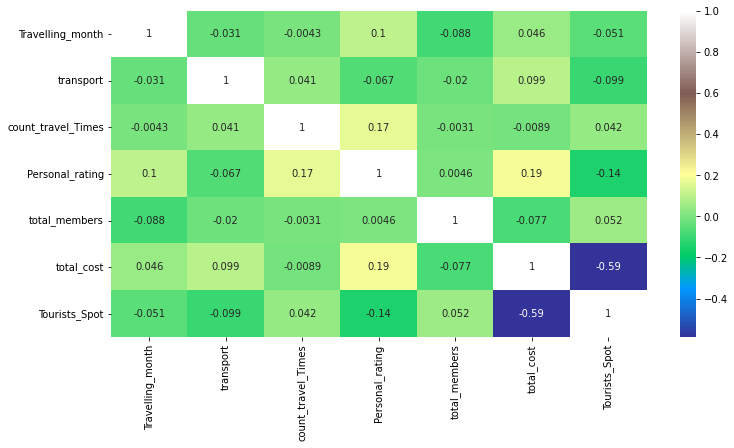

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(myFile.corr(), annot= True, cmap='terrain')

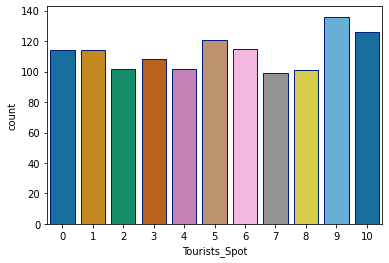

In [12]:
sns.countplot(x='Tourists_Spot',data=myFile,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

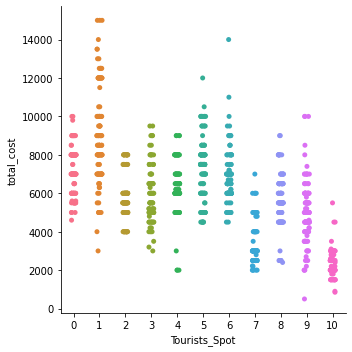

In [13]:
sns.catplot(data= myFile, x='Tourists_Spot', y='total_cost', palette='husl')

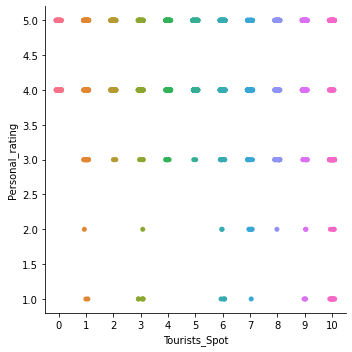

In [14]:
sns.catplot(data= myFile, x='Tourists_Spot', y='Personal_rating', palette='husl')

In [15]:
myFile['Tourists_Spot'].value_counts()

9     136
10    126
5     121
6     115
0     114
1     114
3     108
2     102
4     102
8     101
7      99
Name: Tourists_Spot, dtype: int64

In [16]:
myFile['transport'].value_counts()

2    711
1    212
4    199
5     87
3     29
Name: transport, dtype: int64

In [17]:
x= myFile.iloc[:,:-1]
x

,Travelling_month,transport,count_travel_Times,Personal_rating,total_members,total_cost
0,11,2,3,5,8,9000
1,11,2,4,4,8,3000
2,1,2,2,4,6,7500
3,1,2,1,5,3,2000
4,10,2,1,5,18,5000
...,...,...,...,...,...,...
1233,3,2,2,4,5,5000
1234,3,2,2,4,5,5000
1235,2,2,2,4,8,8500
1236,3,2,2,4,5,5000


In [18]:
y= myFile['Tourists_Spot']
y

0        6
1        7
2        5
3       10
4        6
        ..
1233     3
1234     3
1235     5
1236     3
1237     3
Name: Tourists_Spot, Length: 1238, dtype: int64

In [19]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x,y, test_size= 0.2)

In [20]:
dt_model= DecisionTreeClassifier()
dt_model.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [21]:
print("Decission Tree Result: ")
print(f'Testing Accuracy - : {dt_model.score(Xtest,Ytest)*100:.3f} %')

Decission Tree Result: 
Testing Accuracy - : 80.242 %


Confusion Metrix

In [22]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, dt_model.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, dt_model.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[ 93   0   0   0   0   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0   0   0   0   0]
 [  0   0  78   0   0   0   0   0   0   0   0]
 [  0   0   0  78   0   0   0   0   0   0   0]
 [  0   0   0   0  81   0   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0]
 [  0   1   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0   0  75   0   0   0]
 [  0   0   0   0   0   0   0   0  80   0   0]
 [  0   1   0   0   0   0   0   0   0 110   0]
 [  0   0   0   0   0   0   0   0   0   0 108]]

Confusion Matrix for testing Score: 
 [[19  1  0  0  0  1  0  0  0  0  0]
 [ 0 14  0  0  0  1  1  0  0  0  1]
 [ 2  0 22  0  0  0  0  0  0  0  0]
 [ 1  0  0 20  0  0  3  0  2  4  0]
 [ 1  0  0  1 17  0  2  0  0  0  0]
 [ 0  1  1  0  0 19  0  0  0  0  0]
 [ 2  2  1  1  1  0 18  0  0  1  0]
 [ 0  0  0  0  0  0  0 19  0  3  2]
 [ 0  0  0  0  0  1  1  0 18  1  0]
 [ 0  0  1  0  0  1  2  2  0 17  2]
 [ 0  0  0  0  0  0  0  1  0  1 16]]



In [23]:
print(classification_report(Ytest, dt_model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.78      0.82      0.80        17
           2       0.88      0.92      0.90        24
           3       0.91      0.67      0.77        30
           4       0.94      0.81      0.87        21
           5       0.83      0.90      0.86        21
           6       0.67      0.69      0.68        26
           7       0.86      0.79      0.83        24
           8       0.90      0.86      0.88        21
           9       0.63      0.68      0.65        25
          10       0.76      0.89      0.82        18

    accuracy                           0.80       248
   macro avg       0.81      0.81      0.81       248
weighted avg       0.81      0.80      0.80       248



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


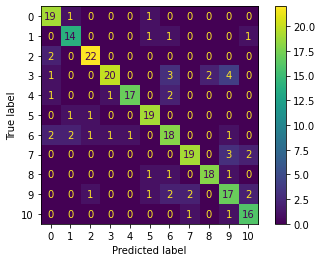

In [24]:
plot_confusion_matrix(dt_model, Xtest, Ytest)  
plt.show()

Random forest

In [25]:
rf_model= RandomForestClassifier()

In [26]:
rf_model.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [27]:
# Make predictions for the test set
y_pred_test = rf_model.predict(Xtest)

In [28]:
# View accuracy score
accuracy_score(Ytest, y_pred_test)

0.8306451612903226

In [29]:

print(f"Testing Accuracy Score: {rf_model.score(Xtest,Ytest)*100:.3f} %")

Testing Accuracy Score: 83.065 %


confusion metrix

In [30]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, rf_model.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, rf_model.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[ 93   0   0   0   0   0   0   0   0   0   0]
 [  0  96   0   0   0   0   0   0   0   1   0]
 [  0   0  78   0   0   0   0   0   0   0   0]
 [  0   0   0  78   0   0   0   0   0   0   0]
 [  0   0   0   0  81   0   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0]
 [  0   1   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0   0  75   0   0   0]
 [  0   0   0   0   0   0   0   0  80   0   0]
 [  0   0   0   0   0   0   0   0   0 111   0]
 [  0   0   0   0   0   0   0   0   0   0 108]]

Confusion Matrix for testing Score: 
 [[19  1  0  0  0  0  1  0  0  0  0]
 [ 0 13  1  0  0  0  1  1  0  1  0]
 [ 0  0 22  0  0  0  2  0  0  0  0]
 [ 0  0  0 22  0  0  1  0  0  7  0]
 [ 1  0  0  1 17  1  1  0  0  0  0]
 [ 0  0  1  0  0 19  0  0  1  0  0]
 [ 1  4  0  0  0  0 19  0  0  2  0]
 [ 0  0  0  0  0  0  0 19  0  2  3]
 [ 0  0  0  1  0  0  1  0 19  0  0]
 [ 0  0  0  0  0  0  2  1  0 20  2]
 [ 0  0  0  0  0  0  0  0  0  1 17]]



In [31]:
print(classification_report(Ytest, rf_model.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.72      0.76      0.74        17
           2       0.92      0.92      0.92        24
           3       0.92      0.73      0.81        30
           4       1.00      0.81      0.89        21
           5       0.95      0.90      0.93        21
           6       0.68      0.73      0.70        26
           7       0.90      0.79      0.84        24
           8       0.95      0.90      0.93        21
           9       0.61      0.80      0.69        25
          10       0.77      0.94      0.85        18

    accuracy                           0.83       248
   macro avg       0.85      0.84      0.84       248
weighted avg       0.85      0.83      0.83       248



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


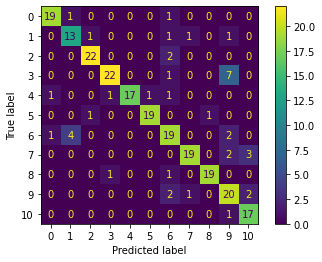

In [32]:
plot_confusion_matrix(rf_model, Xtest, Ytest)  
plt.show()

K- nearest neighbors Algorithm

In [33]:
knn= KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [35]:

print(f"Testing Accuracy Score: {accuracy_score(Ytest, knn.predict(Xtest)) * 100:.3f}%")

Testing Accuracy Score: 70.565%


In [36]:
print(f"Confusion Matrix for training Score: \n {confusion_matrix(Ytrain, knn.predict(Xtrain))}\n")
print(f"Confusion Matrix for testing Score: \n {confusion_matrix(Ytest, knn.predict(Xtest))}\n")

Confusion Matrix for training Score: 
 [[ 87   0   0   1   0   2   1   0   0   2   0]
 [  9  73   1   2   2   4   3   0   0   3   0]
 [  1   2  75   0   0   0   0   0   0   0   0]
 [  4   4   1  59   0   4   1   2   2   1   0]
 [  3   2   0   1  74   0   1   0   0   0   0]
 [  3   7   1   2   0  84   2   0   0   1   0]
 [ 12  11   1   9   4   2  48   0   0   2   0]
 [  1   0   0   0   1   0   0  70   0   2   1]
 [  1   1   1   2   0   1   1   1  72   0   0]
 [ 10   5   1   6   3   0   2   2   1  76   5]
 [  1   0   0   0   1   0   0   2   0   2 102]]

Confusion Matrix for testing Score: 
 [[19  2  0  0  0  0  0  0  0  0  0]
 [ 2 12  0  1  0  0  0  1  0  1  0]
 [ 2  0 22  0  0  0  0  0  0  0  0]
 [ 2  4  1 13  2  0  1  1  0  6  0]
 [ 0  1  0  1 17  0  2  0  0  0  0]
 [ 0  2  0  0  1 17  0  0  1  0  0]
 [ 8  3  0  1  1  0 11  2  0  0  0]
 [ 0  0  0  0  0  0  0 22  1  0  1]
 [ 1  0  0  0  0  1  1  0 18  0  0]
 [ 4  1  1  1  0  2  0  3  0 10  3]
 [ 0  0  0  0  0  0  0  3  0  1 14]]



In [37]:
print(classification_report(Ytest, knn.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        21
           1       0.48      0.71      0.57        17
           2       0.92      0.92      0.92        24
           3       0.76      0.43      0.55        30
           4       0.81      0.81      0.81        21
           5       0.85      0.81      0.83        21
           6       0.73      0.42      0.54        26
           7       0.69      0.92      0.79        24
           8       0.90      0.86      0.88        21
           9       0.56      0.40      0.47        25
          10       0.78      0.78      0.78        18

    accuracy                           0.71       248
   macro avg       0.73      0.72      0.71       248
weighted avg       0.73      0.71      0.70       248



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


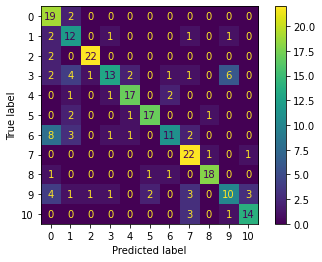

In [38]:
plot_confusion_matrix(knn, Xtest, Ytest)  
plt.show()